### Importaci√≥n de datos



In [48]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

#1. An√°lisis de facturaci√≥n



In [33]:
# Definimos las listas de DataFrames y nombres
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# Calculamos el ingreso total por tienda sumando la columna "Precio"
ingresos = pd.DataFrame({
    "Tienda": nombres_tiendas,
    "Ingreso total": [df["Precio"].sum() for df in tiendas]
})

# Formateamos los ingresos para mostrar con formato monetario (opcional)
ingresos["Ingreso total"] = ingresos["Ingreso total"].apply(lambda x: f"${x:,.0f}")

# Mostramos el resultado
display(ingresos)

Tienda   Ingreso total
0  Tienda 1  $1,150,880,400
1  Tienda 2  $1,116,343,500
2  Tienda 3  $1,098,019,600
3  Tienda 4  $1,038,375,700

/tmp/ipython-input-41-2742161180.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Tienda", y="Ingreso total", data=ingresos, palette="viridis")


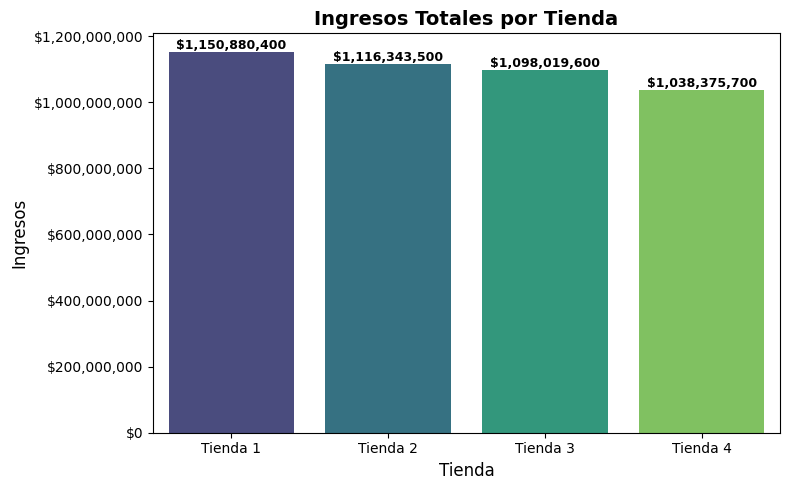

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# 1. Definimos las listas de DataFrames y nombres
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# 2. Calculamos el ingreso total (como n√∫mero, no como texto)
ingresos = pd.DataFrame({
    "Tienda": nombres_tiendas,
    "Ingreso total": [df["Precio"].sum() for df in tiendas]
})

# 3. Gr√°fico de barras verticales (barras que crecen de abajo hacia arriba)
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="Tienda", y="Ingreso total", data=ingresos, palette="viridis")

plt.title("Ingresos Totales por Tienda", fontsize=14, fontweight='bold')
plt.xlabel("Tienda", fontsize=12)
plt.ylabel("Ingresos", fontsize=12)

# Mostrar los valores encima de las barras
for bar in ax.patches:
    valor = bar.get_height()
    ax.annotate(f"${valor:,.0f}",
                (bar.get_x() + bar.get_width() / 2, valor),
                ha='center', va='bottom', fontsize=9, fontweight='bold')

# Formatear el eje Y como moneda
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"${x:,.0f}"))

plt.tight_layout()
plt.show()


# 2. Ventas por categor√≠a

In [34]:
def contar_por_categoria(df, nombre_tienda):
    conteo = df["Categor√≠a del Producto"].value_counts().reset_index()
    conteo.columns = ["Categor√≠a", "Cantidad Vendida"]
    conteo["Tienda"] = nombre_tienda
    return conteo

# Definimos listas
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# Concatenamos los conteos de cada tienda en un solo DataFrame
categorias_vendidas = pd.concat(
    [contar_por_categoria(df, nombre) for df, nombre in zip(tiendas, nombres_tiendas)],
    ignore_index=True
)

# Ordenamos por tienda y luego cantidad descendente
categorias_vendidas = categorias_vendidas.sort_values(by=["Tienda", "Cantidad Vendida"], ascending=[True, False])

# Mostramos resultados por tienda, bien legible
for tienda_nombre in nombres_tiendas:
    print(f"\n--- Categor√≠as m√°s vendidas en {tienda_nombre} ---")
    df_tienda = categorias_vendidas[categorias_vendidas["Tienda"] == tienda_nombre]
    for _, row in df_tienda.iterrows():
        print(f"{row['Categor√≠a']}: {row['Cantidad Vendida']} ventas")



--- Categor√≠as m√°s vendidas en Tienda 1 ---
Muebles: 465 ventas
Electr√≥nicos: 448 ventas
Juguetes: 324 ventas
Electrodom√©sticos: 312 ventas
Deportes y diversi√≥n: 284 ventas
Instrumentos musicales: 182 ventas
Libros: 173 ventas
Art√≠culos para el hogar: 171 ventas

--- Categor√≠as m√°s vendidas en Tienda 2 ---
Muebles: 442 ventas
Electr√≥nicos: 422 ventas
Juguetes: 313 ventas
Electrodom√©sticos: 305 ventas
Deportes y diversi√≥n: 275 ventas
Instrumentos musicales: 224 ventas
Libros: 197 ventas
Art√≠culos para el hogar: 181 ventas

--- Categor√≠as m√°s vendidas en Tienda 3 ---
Muebles: 499 ventas
Electr√≥nicos: 451 ventas
Juguetes: 315 ventas
Electrodom√©sticos: 278 ventas
Deportes y diversi√≥n: 277 ventas
Libros: 185 ventas
Instrumentos musicales: 177 ventas
Art√≠culos para el hogar: 177 ventas

--- Categor√≠as m√°s vendidas en Tienda 4 ---
Muebles: 480 ventas
Electr√≥nicos: 451 ventas
Juguetes: 338 ventas
Deportes y diversi√≥n: 277 ventas
Electrodom√©sticos: 254 ventas
Art√≠culos 

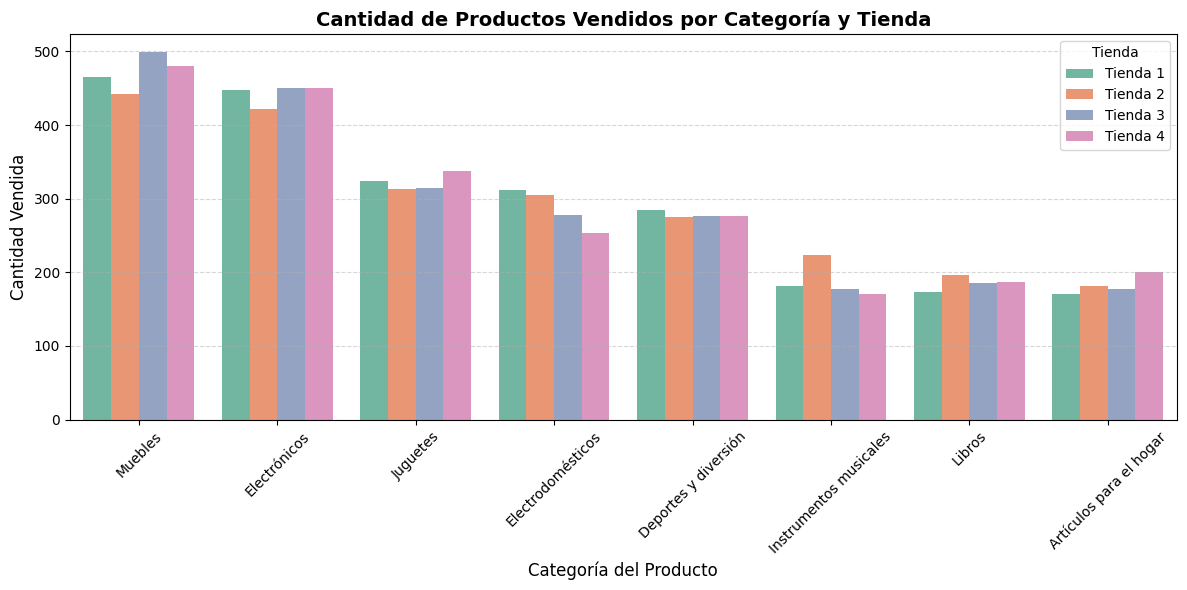

In [42]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Gr√°fico de barras agrupadas
sns.barplot(
    data=categorias_vendidas,
    x="Categor√≠a",
    y="Cantidad Vendida",
    hue="Tienda",
    palette="Set2"
)

# Est√©tica del gr√°fico
plt.title("Cantidad de Productos Vendidos por Categor√≠a y Tienda", fontsize=14, fontweight='bold')
plt.xlabel("Categor√≠a del Producto", fontsize=12)
plt.ylabel("Cantidad Vendida", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Tienda")
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


# 3. Calificaci√≥n promedio de la tienda


In [35]:
# Definimos listas (si no las ten√©s definidas)
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# Calculamos el promedio de la columna "Calificaci√≥n" para cada tienda
promedios_calificaciones = [
    (nombre, df["Calificaci√≥n"].mean())
    for df, nombre in zip(tiendas, nombres_tiendas)
]

# Lo convertimos a DataFrame para mejor visualizaci√≥n
promedios_df = pd.DataFrame(promedios_calificaciones, columns=["Tienda", "Calificaci√≥n Promedio"])

# Redondeamos a 2 decimales
promedios_df["Calificaci√≥n Promedio"] = promedios_df["Calificaci√≥n Promedio"].round(2)

# Mostramos el resultado
display(promedios_df)



Tienda  Calificaci√≥n Promedio
0  Tienda 1                   3.98
1  Tienda 2                   4.04
2  Tienda 3                   4.05
3  Tienda 4                   4.00

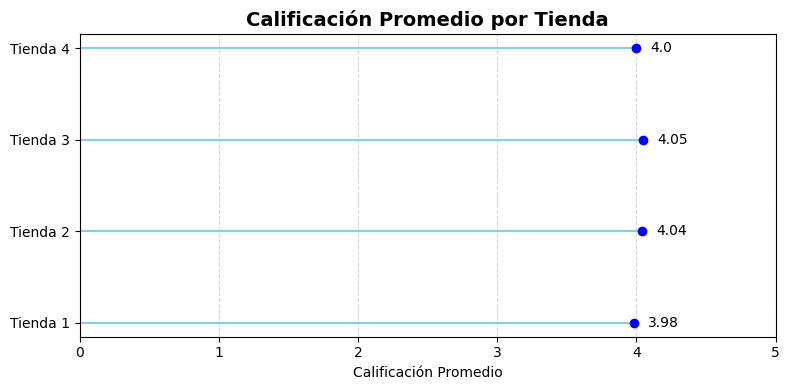

In [43]:
import matplotlib.pyplot as plt

# Datos
tiendas = promedios_df["Tienda"]
calificaciones = promedios_df["Calificaci√≥n Promedio"]

# Crear figura
plt.figure(figsize=(8, 4))

# Gr√°fico de puntos
plt.hlines(y=tiendas, xmin=0, xmax=calificaciones, color='skyblue')
plt.plot(calificaciones, tiendas, "o", color='blue')

# Est√©tica
plt.xlabel("Calificaci√≥n Promedio")
plt.title("Calificaci√≥n Promedio por Tienda", fontsize=14, fontweight='bold')
plt.xlim(0, 5)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Mostrar valores num√©ricos al lado de cada punto
for i, valor in enumerate(calificaciones):
    plt.text(valor + 0.1, tiendas[i], f"{valor}", va='center', fontsize=10)

plt.tight_layout()
plt.show()



# 4. Productos m√°s y menos vendidos

In [53]:
def productos_mas_menos_vendidos(df, nombre_tienda):
    conteo = df["Producto"].value_counts().reset_index()
    conteo.columns = ["Producto", "Cantidad Vendida"]
    conteo["Tienda"] = nombre_tienda

    # Producto m√°s vendido (m√°ximo)
    mas_vendido = conteo.loc[conteo["Cantidad Vendida"].idxmax()]
    # Producto menos vendido (m√≠nimo)
    menos_vendido = conteo.loc[conteo["Cantidad Vendida"].idxmin()]

    return mas_vendido, menos_vendido

tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

resultados = []

for df, nombre in zip(tiendas, nombres_tiendas):
    mas, menos = productos_mas_menos_vendidos(df, nombre)
    resultados.append({
        "Tienda": nombre,
        "Producto M√°s Vendido": mas["Producto"],
        "Ventas M√°s Vendidas": mas["Cantidad Vendida"],
        "Producto Menos Vendido": menos["Producto"],
        "Ventas Menos Vendidas": menos["Cantidad Vendida"]
    })

# Convertimos a DataFrame para mostrar
df_resultados = pd.DataFrame(resultados)

display(df_resultados)


Tienda       Producto M√°s Vendido  Ventas M√°s Vendidas  \
0  Tienda 1                 Microondas                   60   
1  Tienda 2  Iniciando en programaci√≥n                   65   
2  Tienda 3              Kit de bancas                   57   
3  Tienda 4                   Cama box                   62   

      Producto Menos Vendido  Ventas Menos Vendidas  
0  Auriculares con micr√≥fono                     33  
1              Juego de mesa                     32  
2    Bloques de construcci√≥n                     35  
3         Guitarra el√©ctrica                     33

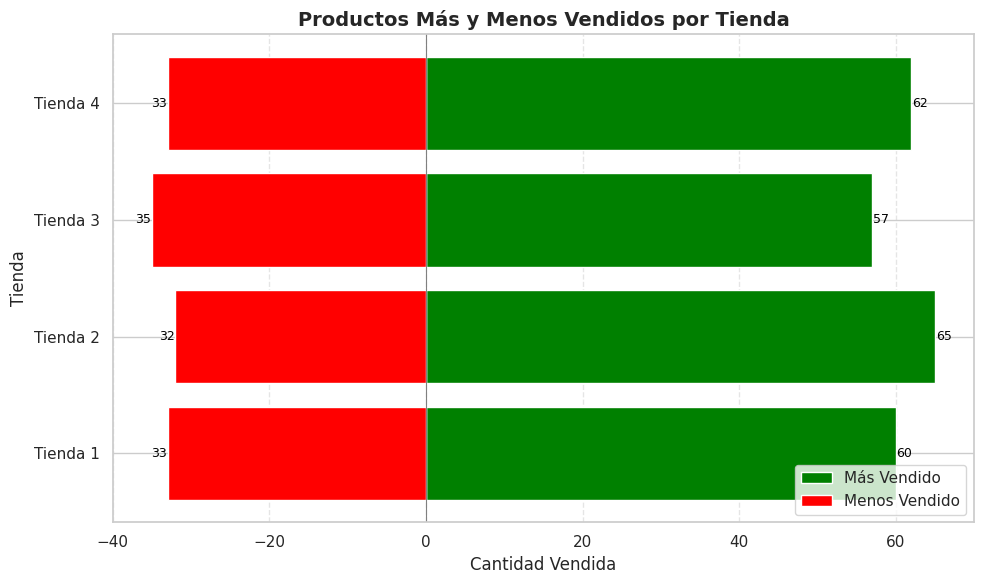

In [52]:
import matplotlib.pyplot as plt

# Preparar datos
tiendas = df_resultados["Tienda"]
mas_vendidos = df_resultados["Ventas M√°s Vendidas"]
menos_vendidos = df_resultados["Ventas Menos Vendidas"]

# Crear figura
plt.figure(figsize=(10, 6))

# Gr√°fico de barras horizontales en direcciones opuestas
plt.barh(tiendas, mas_vendidos, color='green', label='M√°s Vendido')
plt.barh(tiendas, [-v for v in menos_vendidos], color='red', label='Menos Vendido')

# Agregar etiquetas
for i in range(len(tiendas)):
    plt.text(mas_vendidos[i] + 0.1, i, f"{mas_vendidos[i]}", va='center', ha='left', fontsize=9, color='black')
    plt.text(-menos_vendidos[i] - 0.1, i, f"{menos_vendidos[i]}", va='center', ha='right', fontsize=9, color='black')

# Est√©tica
plt.axvline(0, color='gray', linewidth=0.8)
plt.title("Productos M√°s y Menos Vendidos por Tienda", fontsize=14, fontweight='bold')
plt.xlabel("Cantidad Vendida")
plt.ylabel("Tienda")
plt.legend(loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Ajustes
plt.tight_layout()
plt.show()


# 5. Env√≠o promedio por tienda



In [51]:
# Listas ya definidas
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# Calculamos el costo de env√≠o promedio para cada tienda
envio_promedio = [
    (nombre, df["Costo de env√≠o"].mean())
    for df, nombre in zip(tiendas, nombres_tiendas)
]

# Convertimos a DataFrame para mejor presentaci√≥n
df_envio = pd.DataFrame(envio_promedio, columns=["Tienda", "Costo de Env√≠o Promedio"])

# Redondeamos a 2 decimales
df_envio["Costo de Env√≠o Promedio"] = df_envio["Costo de Env√≠o Promedio"].round(2)

display(df_envio)



Tienda  Costo de Env√≠o Promedio
0  Tienda 1                 26018.61
1  Tienda 2                 25216.24
2  Tienda 3                 24805.68
3  Tienda 4                 23459.46

/tmp/ipython-input-54-3032911607.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="Tienda", y="Costo de env√≠o", data=df_envios, jitter=True, palette="Set2", size=6)


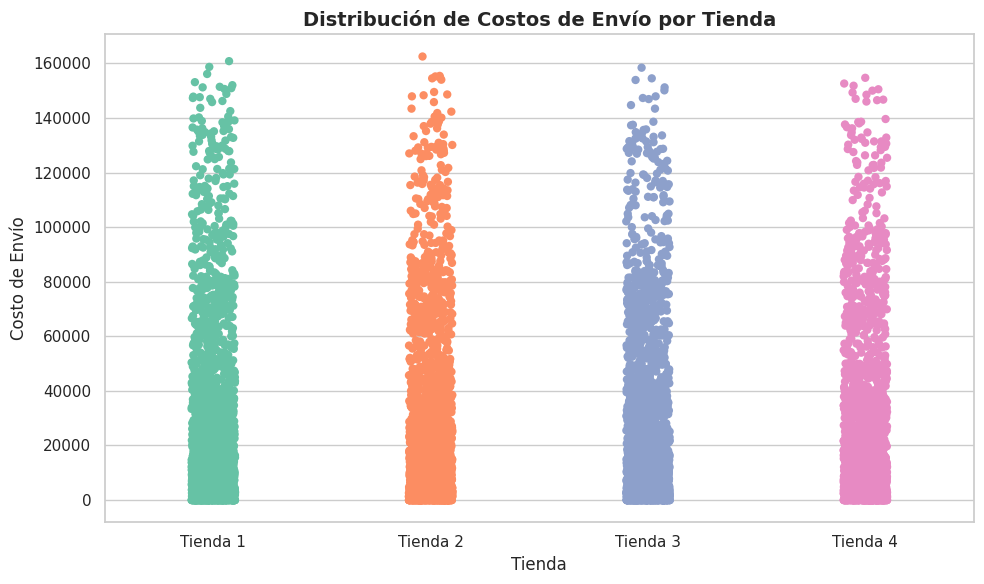

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Concatenamos los datasets con una columna extra que indica la tienda
df_envios = pd.concat(
    [df.assign(Tienda=nombre) for df, nombre in zip(tiendas, nombres_tiendas)],
    ignore_index=True
)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Gr√°fico de puntos (stripplot)
sns.stripplot(x="Tienda", y="Costo de env√≠o", data=df_envios, jitter=True, palette="Set2", size=6)

plt.title("Distribuci√≥n de Costos de Env√≠o por Tienda", fontsize=14, fontweight="bold")
plt.xlabel("Tienda", fontsize=12)
plt.ylabel("Costo de Env√≠o", fontsize=12)
plt.tight_layout()
plt.show()


# Resumen


## üìå Informe Final ‚Äî Recomendaci√≥n para el Sr. Juan

**Introducci√≥n**

El Sr. Juan busca iniciar un nuevo emprendimiento y para ello debe decidir cu√°l tienda de la cadena Alura Store deber√≠a vender, focaliz√°ndose en identificar la tienda menos eficiente para optimizar sus recursos y esfuerzos. Este informe sintetiza los an√°lisis realizados sobre ingresos, ventas por categor√≠a, satisfacci√≥n del cliente, productos m√°s y menos vendidos, y costos de env√≠o de las cuatro tiendas. A partir de estos datos y sus respectivas visualizaciones, se presentar√° una recomendaci√≥n clara y fundamentada.

**Desarrollo**
1. **Ingresos totales**

Los ingresos reflejan la capacidad de generar ventas en volumen y valor. La Tienda 1 presenta el mayor ingreso total con aproximadamente 1,150 millones, seguida por Tienda 2 y Tienda 3, con ingresos algo menores, mientras que la Tienda 4 reporta el ingreso m√°s bajo con cerca de $1,038 millones. Esto indica que la Tienda 4 tiene una menor capacidad de facturaci√≥n, lo que puede ser una se√±al de menor eficiencia comercial.

2. **Ventas por categor√≠a**

Todas las tiendas mantienen una estructura similar en las categor√≠as m√°s vendidas, siendo "Muebles", "Electr√≥nicos" y "Juguetes" las predominantes. Sin embargo, la Tienda 4 muestra menores cantidades en categor√≠as clave como "Electrodom√©sticos" y "Deportes y diversi√≥n" en comparaci√≥n con las dem√°s, lo que puede reflejar un rango menos competitivo o menor atractivo en su oferta.

3. **Calificaci√≥n promedio de clientes**

La satisfacci√≥n del cliente es un indicador esencial para la fidelizaci√≥n y reputaci√≥n. La Tienda 3 lidera con una calificaci√≥n promedio de 4.05, seguida por Tienda 2 y Tienda 4 con calificaciones cercanas a 4.00. La Tienda 1, aunque con mayores ingresos, tiene la calificaci√≥n m√°s baja (3.98). No obstante, la Tienda 4 no destaca en este aspecto, ubic√°ndose en un nivel intermedio, sin diferenciarse positivamente.

4. **Productos m√°s y menos vendidos**

La variedad y rotaci√≥n de productos reflejan la din√°mica comercial. La Tienda 4 muestra un producto m√°s vendido con 62 unidades y uno menos vendido con 33 unidades, cifras similares a las otras tiendas, pero sin un volumen sobresaliente. Esto apunta a una oferta y demanda relativamente modestas.

5. **Costo de env√≠o promedio**

El costo de env√≠o es relevante para la rentabilidad y competitividad. La Tienda 4 tiene el costo promedio de env√≠o m√°s bajo ($23,459), lo cual es positivo para m√°rgenes y atracci√≥n de clientes, pero no compensa sus menores ingresos y ventas.

# Conclusi√≥n y recomendaci√≥n

Tras evaluar todos los indicadores, la Tienda 4 se perfila como la menos eficiente dentro de la cadena Alura Store, considerando su menor ingreso total, ventas por categor√≠a inferiores en segmentos clave y calificaciones promedio mediocres. Aunque su costo de env√≠o es m√°s bajo, esto no logra compensar su desempe√±o general.

Por lo tanto, se recomienda que el Sr. Juan venda la Tienda 4 para enfocar su nuevo emprendimiento en las tiendas con mejor rendimiento, tales como Tienda 1, Tienda 2 y Tienda 3, que presentan mejores ingresos, mayor satisfacci√≥n del cliente y un rango m√°s amplio y competitivo de productos vendidos.

Esta decisi√≥n est√° fundamentada en un an√°lisis integral que considera tanto aspectos comerciales (ingresos y ventas) como operativos (costos de env√≠o y satisfacci√≥n), garantizando que el nuevo emprendimiento tenga mayores probabilidades de √©xito y rentabilidad.